This insurance dataset contains information about insured individuals, along with the charges they incur. Here is a description of each column:

- age: The age of the insured (integer).

- sex: The gender of the insured (string, value: "male" or "female").

- bmi: The insured's Body Mass Index (BMI), a measure of weight relative to height (float).

- children: The number of children/dependents covered by the insurance policy (integer).

- smoker: The insured's smoking status (string, value: "yes" or "no").

- region: The insured's region of residence in the US (string, value: "southwest", "southeast", "northwest", or "northeast").

- charges: The medical costs charged by the insurer (float). This is the target variable to predict.
> #### 1. OBJECTIVE DEFINITION

To test whether there is a significant difference in insurance costs between smokers and non-smokers. The goal is to understand the extent to which smoking status affects insurance costs.

> #### 2. HYPOTHESIS

- Null Hypothesis (H0):There is no significant difference in insurance costs between smokers and non-smokers.

- Alternative Hypothesis (H1): There is a significant difference in insurance costs between smokers and non-smokers.

> #### 3.Test Design
1. Group:
- Data will be divided based on smoking status:
- Control Group: Non-smoker (Smoker = "no")
- Target Group: Smoker (Smoker = "yes")

2. Sample Size: We will use all the data available in the dataset.
3. Randomization: The data is assumed to be random because it comes from an existing dataset.
4. Duration: No specific duration is required because the data has already been collected.

#### 4. Data Collection
- Measured Metrics:
 -  Insurence Charges (charges): A numeric variable that is the primary metric.

 - Smoker Status (smoker): Categorical variables ("yes"/"no") to divide groups.

> #### 5. Data Analysis
- Statistical Tests:  Independent Samples T-test
- Significance Level: using a p value of <0.05 to determine significance.

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("insurance.csv")

# Check missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [49]:
# Check Duplicate
len(df.drop_duplicates()) / len(df)

0.9992526158445441

In [50]:
# Handling Duplicated Data
df =df.drop_duplicates()

In [51]:
# Re-check the data
len(df.drop_duplicates()) / len(df)

1.0

In [52]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [53]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


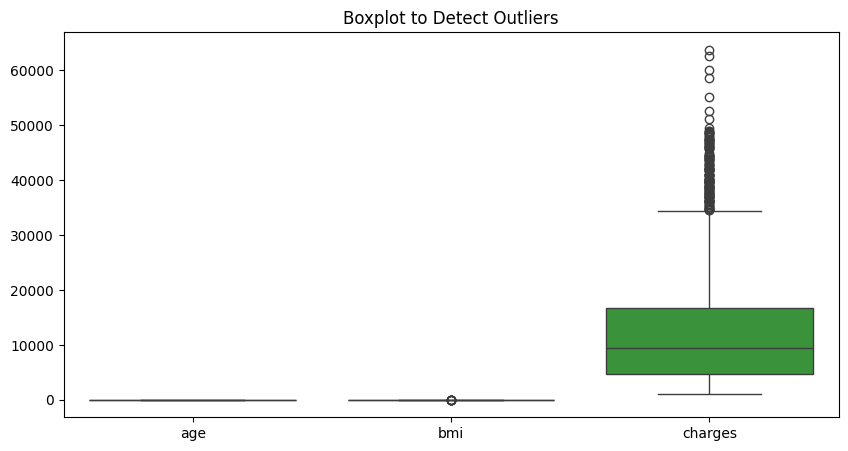

In [54]:
# Check outlier using boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['age', 'bmi', 'charges']])
plt.title("Boxplot to Detect Outliers")
plt.show()

>We're not handling the outlier,why?

The charges column is the cost of insurance, which is likely influenced by factors such as age, BMI, smoking habits, and health conditions.
In this dataset, outliers are likely people who smoke or have certain health conditions, which can indeed lead to very high insurance costs.
So, if someone has a high BMI + smokes + is older, then high charges make sense.

In [55]:
# Make sure the data type is correct
print("\nInfo DataFrame Info Before Cleaning:")
print(df.info())


Info DataFrame Info Before Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB
None


In [56]:
# Convert categories to type 'category' for optimization
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')

print("\nInfo DataFrame Setelah Cleaning:")
print(df.info())


Info DataFrame Setelah Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1337 non-null   int64   
 1   sex       1337 non-null   category
 2   bmi       1337 non-null   float64 
 3   children  1337 non-null   int64   
 4   smoker    1337 non-null   category
 5   region    1337 non-null   category
 6   charges   1337 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 56.6 KB
None


In [57]:
# Separate data by smoking status
smoker_charges = df[df['smoker'] == 'yes']['charges']
non_smoker_charges = df[df['smoker'] == 'no']['charges']

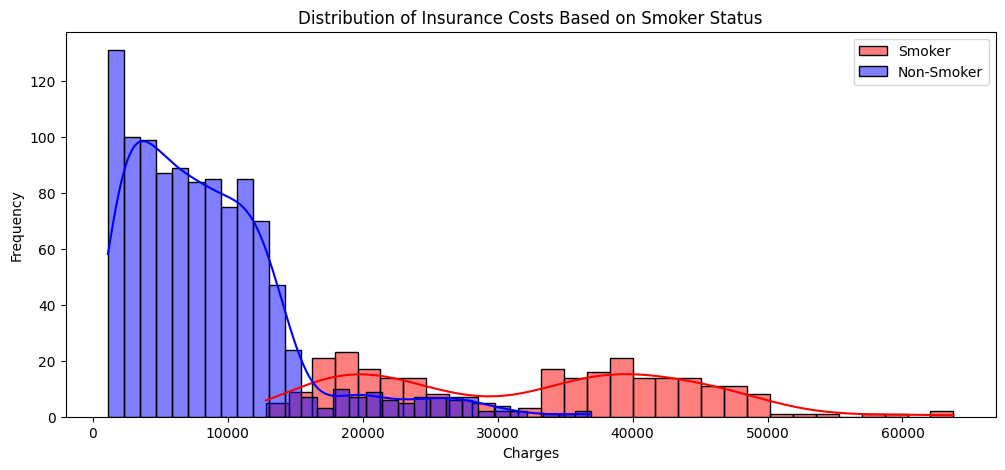

In [58]:
# Visualization of insurance cost distribution by smoking status
plt.figure(figsize=(12, 5))
sns.histplot(smoker_charges, kde=True, color='red', label='Smoker', bins=30)
sns.histplot(non_smoker_charges, kde=True, color='blue', label='Non-Smoker', bins=30)
plt.legend()
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Insurance Costs Based on Smoker Status')
plt.show()

Distribusi biaya asuransi untuk perokok (merah) menunjukkan nilai yang lebih tinggi dibandingkan non-perokok (biru).
Sebagian besar non-perokok memiliki biaya asuransi lebih rendah (di bawah 15.000), sedangkan perokok memiliki distribusi yang lebih menyebar dan cenderung lebih tinggi.
Hal ini menunjukkan indikasi awal bahwa ada kemungkinan perokok membayar lebih mahal untuk asuransi.

<ipython-input-59-26350d4cdc09>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['smoker'], y=df['charges'], palette={'yes': 'red', 'no': 'blue'})


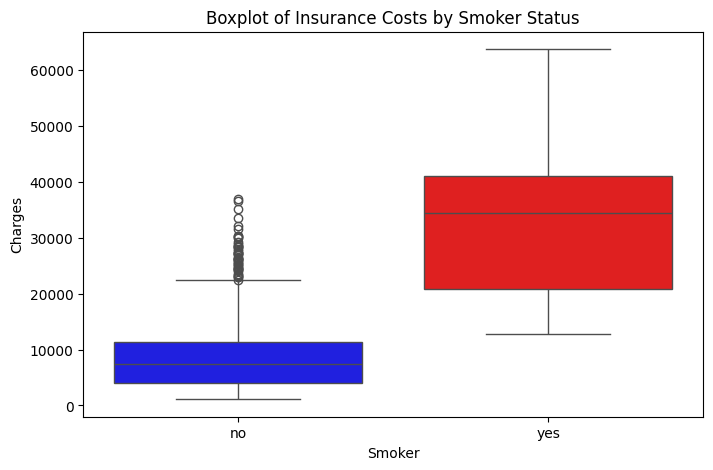

In [59]:
# Boxplot to see the differences in distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['smoker'], y=df['charges'], palette={'yes': 'red', 'no': 'blue'})
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Boxplot of Insurance Costs by Smoker Status')
plt.show()

>Smokers pay much higher insurance premiums than non-smokers. Why?

- The median insurance cost for smokers is much higher than for non-smokers.
This shows that smoker status greatly influences insurance costs.
This is understandable because smokers have higher health risks, so the premiums charged are also higher.
The distribution of smoker data is wider than non-smokers.

- Smokers have a very large range of costs, from around 15,000 to more than 60,000.
In contrast, non-smokers are more concentrated below 20,000, although there are some outliers.
This means that there is a large variation in smoker insurance costs, possibly depending on other factors such as age, BMI, or health conditions.
The outliers are more in the non-smoker group.

- In the "no" group, there are many points above the upper whisker limit, indicating that there are some non-smokers who pay high costs.
It is likely that these are non-smokers with high BMIs or certain health conditions that increase their insurance costs.

####Conclusion
Smoker status greatly influences insurance costs.
Smokers pay more than non-smokers.
Outliers in non-smokers can be reasonable, because they can be caused by other factors such as BMI or certain medical conditions.
If you want to do predictive modeling, this smoker variable is very important to include because it has a big impact on insurance costs.

In [60]:
# T-Test
stat, p_value = stats.ttest_ind(smoker_charges, non_smoker_charges, equal_var=False)

# Showing Hipotesis
print("Independent Samples T-Test")
print("H₀ (Null Hypothesis): There is no significant difference in average insurance costs between smokers and non-smokers.")
print("H₁ (Alternative Hypothesis): There is a significant difference in average insurance costs between smokers and non-smokers.\n")

# Result
print("T-Test Results:")
print(f"T-Statistic: {stat:.4f}")
print(f"P-Value: {p_value:.4f}")

Independent Samples T-Test
H₀ (Null Hypothesis): There is no significant difference in average insurance costs between smokers and non-smokers.
H₁ (Alternative Hypothesis): There is a significant difference in average insurance costs between smokers and non-smokers.

T-Test Results:
T-Statistic: 32.7423
P-Value: 0.0000


In [61]:
# Conclusion
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Since the p-value < 0.05, we reject H₀.")
    print("There is a significant difference in average insurance costs between smokers and non-smokers.")
else:
    print("\nConclusion: Since p-value >= 0.05, we fail to reject H₀.")
    print("There was no significant difference in average insurance costs between smokers and non-smokers.")


Conclusion: Since the p-value < 0.05, we reject H₀.
There is a significant difference in average insurance costs between smokers and non-smokers.
